In [1]:
"""
generate train data, validation data, and test data
"""
import os
%matplotlib inline

import matplotlib.pyplot as plt
from scipy.ndimage import imread
from scipy.misc import imsave
import numpy as np
import os
from numpy import genfromtxt
import tensorflow as tf
from PIL import Image
import pickle
import helper
from tempfile import TemporaryFile

# Get dataset
### get gallery

In [ ]:
# gallery path
gallery_path = r'C:\Users\rez\Gait_recognition_using_RNN\OULP-C1V2_Pack\OULP-deference-(128x88)\Seq00'

# get all subjects
subjects = os.listdir(gallery_path) 

# 得到iteration
y = helper.generate_data_list(gallery_path, subjects)

subject_list = helper.generate_subject_list(subjects, gallery_path, y)

In [61]:
subject_list = np.array(subject_list)
np.array(subject_list[0]).shape

(4, 31, 128, 88)

In [65]:
with open(r'C:\Users\rez\Gait_recognition_using_RNN\data\preprocess_1.p', 'wb') as out_file:
    pickle.dump((subject_list), out_file)

### generate normalized data list

In [2]:
# gallery path
# gallery_path = r'C:\Users\rez\Gait_recognition_using_RNN\OULP-C1V2_Pack\OULP-deference-(128x88)\Seq00'
gallery_path = '/Users/congcong/Desktop/Gait/OULP-Database/OULP-C1V2_Pack/OULP-deference-(128x88)/Seq00'

# get all subjects
subjects = os.listdir(gallery_path)
subjects = subjects[1:]

# 得到iteration
y = helper.generate_data_list(gallery_path, subjects)

subject_list_normalized = helper.generate_subject_normalized_list(subjects, gallery_path, y)

In [3]:
subject_list_normalized = np.array(subject_list_normalized)
for idx, each in enumerate(subject_list_normalized):
    subject_list_normalized[idx] = np.array(subject_list_normalized[idx])

In [134]:
subject_list_normalized_1 = subject_list_normalized[:400]
# outfile = TemporaryFile()
out_file = open(r'gait_data/gait_gallery_1_500.npy', 'wb') 
np.save(out_file, subject_list_normalized_1)

OSError: [Errno 22] Invalid argument

### get probe

In [ ]:
gallery_path_2 = r'C:\Users\rez\Gait_recognition_using_RNN\OULP-C1V2_Pack\OULP-deference-(128x88)\Seq01'

subjects = os.listdir(gallery_path_2) 

y2 = helper.generate_data_list(gallery_path_2, subjects)

subject_list_2_normalized = helper.generate_subject_normalized_list(subjects, gallery_path_2, y2)

In [ ]:
with open(r'C:\Users\rez\Gait_recognition_using_RNN\data\preprocess_2_normalized.p', 'wb') as out_file:
    pickle.dump((subject_list_2_normalized), out_file)

(128, 88)

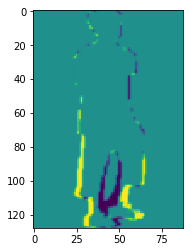

In [145]:
plt.imshow(subject_list[0][0][0])
subject_list[0][0][0].shape

# Checkpoint 1

In [71]:
# restore the data
data_list_gallery = pickle.load(open(r'C:\Users\rez\Gait_recognition_using_RNN\data\preprocess_1.p', mode='rb'))

In [73]:
data_list_probe = pickle.load(open(r'C:\Users\rez\Gait_recognition_using_RNN\data/preprocess_2.p', mode='rb'))

In [135]:
data_list_gallery = subject_list_normalized_1
data_list_gallery[1].shape

(4, 31, 11264)

# get_subject_batches

In [110]:
def get_all_degree(train_or_val_x):
    """
    把所有subject的degree拆开组堆成一列
    """
    total_subject = []
    for subject in train_or_val_x:
        for degree in subject:
            total_subject.append(np.array(degree))
    total_subject = np.array(total_subject)
    
    return total_subject

def get_batches(subject, batch_size):
# def get_30_batches(ii, subject):
    """
    yield every batch inside of one subject
    [1, 2, 3, ..., 29] <---> [2, 3, 4, ..., 30]
    :params ii: idx
    subject: a list of subject with its all images in one degree.
    """
    data_length = len(subject)
    n_batches = data_length//batch_size
    subject = subject[:n_batches * batch_size]
    
    for ii in range(n_batches):
        new_batch = []
        new_batch = subject[ii: ii + batch_size]
#         for jj in new_batch:
#             for kk in jj:
                
#             train_batch = np.ndarray([1, 28,11264], dtype=np.float32)
#             for idx, each in enumerate(subject[:28]):
#                 train_batch[0, idx, :] = np.array(each).flatten()
        
        yield new_batch

def process_batch(batch):
    """
    形成length_sequence, 形成train_batch
    """
    seq_length = []
    train_batch = np.zeros([batch.shape[0], 41, 11264], dtype=np.float32)
    target_batch = np.zeros([batch.shape[0], 41, 11264], dtype=np.float32)
    for ii, each in enumerate(batch):
        ii_length = each.shape[0] - 1
        seq_length.append(ii_length)
        train_batch[ii, :ii_length, :] = each[:-1]
        target_batch[ii, :ii_length, :] = each[1:]
        
#     seq_length = np.array(seq_length)
        
    return (train_batch, target_batch, seq_length)
             
        #     if ii == 0:
    #         out_batch = np.ndarray([1, 15, 11264], dtype=np.float32)
    #         for idx, each in enumerate(subject[:15]):
    #             each = np.array(each).flatten()
    #             out_batch[0, idx, :] = each
    #     else:
    #         out_batch = np.ndarray([1, 1, 11264], dtype=np.float32)
    #         out_batch[0, 0, :] = np.array(subject[ii + 14]).flatten()
    #     yield out_batch
    

# process_batch(next(get_batches(x, 20))

# Get train, validation, test dataset

In [7]:
print("data length: {}".format(len(data_list_gallery)))
print("every length has : {}".format(np.array(data_list_gallery[0]).shape))

data length: 200
every length has : (4, 31, 11264)


In [136]:
split_frac = 0.9
split_num = int(split_frac*len(data_list_gallery))

train_x_raw, val_x_raw = data_list_gallery[:split_num], data_list_gallery[split_num:]
# train_y, val_y = labels[:split_num], labels[split_num:]
val_test_split = len(val_x_raw)//2
val_x_raw, test_x_raw = val_x_raw[:val_test_split], val_x_raw[val_test_split:]
# val_y, test_y = val_y[:int(len(val_y)/2)], val_y[int(len(val_y)/2):]

In [137]:
print("Train_x: {}".format(np.array(train_x_raw).shape))
print("Validation_x: {}".format(np.array(val_x_raw).shape))

Train_x: (360,)
Validation_x: (20,)


# Build the graph

In [194]:
lstm_size = 4000
lstm_layers = 1
lr = 0.0005
batch_size = 80

### inputs

In [195]:
tf.reset_default_graph()
graph = tf.Graph()
with graph.as_default():
    inputs_ = tf.placeholder(tf.float32, [None, None, 11264], name="inputs")
    target_ = tf.placeholder(tf.float32, [None, None, 11264], name="targets")
    keep_prob = tf.placeholder(tf.float32, name="keep_prob")
    learning_rate = tf.placeholder(tf.float32, name='learning_rate')
    seq_length = tf.placeholder(tf.int32, (None, ), name='seq_length')

### LSTM 

In [196]:
with graph.as_default():
    # Your basic LSTM cell
    lstm = tf.contrib.rnn.BasicLSTMCell(lstm_size, forget_bias=1.0, activation=tf.nn.relu)
    
    # Add dropout to the cell
    drop = tf.contrib.rnn.DropoutWrapper(lstm, output_keep_prob=keep_prob)
    
    # Stack up multiple LSTM layers, for deep learning
    cell = tf.contrib.rnn.MultiRNNCell([drop] * lstm_layers)
    
    # Getting an initial state of all zeros
    initial_state = cell.zero_state(batch_size, tf.float32)
    
    outputs, final_state = tf.nn.dynamic_rnn(cell, inputs_, initial_state=initial_state, sequence_length=seq_length)

# output

In [197]:
with graph.as_default():    
    predictions = tf.contrib.layers.fully_connected(outputs, 11264, activation_fn=tf.sigmoid)

    cost = tf.losses.mean_squared_error(target_, predictions)
#     cost = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(
#                                     logits=predictions, labels=target_))
    
    optimizer = tf.train.AdamOptimizer(learning_rate).minimize(cost)

# Train

In [185]:
train_x = get_all_degree(train_x_raw)
val_x = get_all_degree(val_x_raw)

In [198]:
val_x.shape

(80,)

In [199]:
epochs = 10

with graph.as_default():
    saver = tf.train.Saver()
    
with tf.Session(graph=graph) as sess:
    sess.run(tf.global_variables_initializer())
    iteration = 1
    
    for e in range(epochs):
        for each_batch in range(len(train_x)//batch_size):
            state = sess.run(initial_state)
            
            train_batch, target_batch, sq_length = process_batch(next(get_batches(train_x, batch_size)))
            print(type(sq_length))
            feed = {inputs_: train_batch,
                    target_: target_batch,
                    keep_prob: 1,
                    initial_state: state,
                    learning_rate: lr,
                    seq_length: sq_length
                    }
            
            loss, _ = sess.run([cost, optimizer], feed_dict=feed)
            
            if iteration%5==0:
                print("Epoch: {}/{}".format(e, epochs),
                      "Iteration: {}".format(iteration),
                      "Train loss: {:.3f}".format(loss))
                    
            if iteration%25==0:
                validation_loss = []
                
                for val_subject in range(len(val_x)//batch_size):
                    
                    val_state = sess.run(cell.zero_state(batch_size, tf.float32))
                    
                    val_batch, val_target_batch, sq_length = process_batch(next(get_batches(val_x, batch_size)))
                    
                    feed = {inputs_: val_batch,
                            target_: val_target_batch,
                            keep_prob: 1,
                            initial_state: val_state,
                            seq_length: sq_length
                           }
                            
                    val_loss = sess.run([cost], feed_dict=feed)
                        
                    validation_loss.append(val_loss)
                print("Validation loss: {:.3f}".format(np.mean(validation_loss)))
                
            iteration += 1
            
    saver.save(sess, r"C:\Users\rez\Gait_recognition_using_RNN\checkpoints\Gait_RNN.ckpt")

<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
Epoch: 0/10 Iteration: 5 Train loss: 0.236
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
Epoch: 0/10 Iteration: 10 Train loss: 0.243
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
Epoch: 0/10 Iteration: 15 Train loss: 0.249
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
Epoch: 1/10 Iteration: 20 Train loss: 0.251
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
Epoch: 1/10 Iteration: 25 Train loss: 0.252
Validation loss: 0.252
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
Epoch: 1/10 Iteration: 30 Train loss: 0.252
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
Epoch: 2/10 Iteration: 35 Train loss: 0.252
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
Epoch: 2/10 Iteration: 40 Train loss: 0.252
<class 'list'>
<class 'lis

KeyboardInterrupt: 